# FINA

## 0. Previos

Se cargan las bases y las librerías a utilizar.

In [1]:
# Librerías

import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels
from scipy import stats
from pingouin import pairwise_ttests #this is for performing the pairwise tests
import pydotplus

from io import StringIO
from IPython.display import Image, SVG
from graphviz import Source
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.patches import Patch


from scipy.stats import chi2_contingency, norm

from sklearn.linear_model import LogisticRegression
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import StratifiedKFold, train_test_split
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn.model_selection import GridSearchCV

from sympy import var, plot_implicit, Eq


#import generic_funcions as gf
#import adherence_functions as af
import warnings
warnings.filterwarnings('ignore')

ruta_archivos = ''

C:\Users\Beto\Anaconda3\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.4, the latest is 0.3.6.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


## 1. Variables Dataframe

In [2]:
base = pd.read_csv( ruta_archivos + 'base_adeherencia_features_3.csv', sep='|' )

In [3]:
print(base.shape)

base['adeherencia_12'] = (base['adeherencia_12']/base['cantidad']).apply(lambda x: 1 if x>=0.5 else 0)
#base['adeherencia_12'] = base['adeherencia_12'].apply(lambda x: 1 if x>=1 else x)

ids = ['id','year','month','adeherencia_12']
base.head()

(3717, 142)


,id,year,month,adeherencia_12,cantidad,key,far_rea_asma_sum_6,far_rea_total_sum_6,far_evo_aun_sum_6,far_cau_def_sum_6,...,hab_ejercicio_avg_12,inc_con_sum_6,inc_inc_sum_6,inc_con_sum_12,inc_inc_sum_12,imc_avg_6,imc_avg_12,imc_foto,adh_sum_6,adh_sum_12
0,500547,2016,7,0,1.0,1,NaN,NaN,NaN,NaN,...,NaN,0.0,3.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN
1,500547,2019,3,0,4.0,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,500547,2019,10,0,5.0,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,25.8,NaN,NaN,0.0
3,500547,2019,12,0,4.0,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,25.8,NaN,0.0,0.0
4,500547,2020,1,0,3.0,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,25.8,NaN,0.0,0.0


In [4]:
# Using variables vector of 'Mostrar' analysis.
vec2 = ['bio_benralizumab_avg_12', 'med_num_doses_otra_avg_6', 'anf_j_sum_12', 'acd_uso_inhal_avg_12', 'epo_4_sum_6', 'urg_j_total_sum_12', 'cal_psi_avg_12', 'med_num_dis_avg_12', 'far_des_no_flag', 'far_rea_total_sum_6', 'far_cau_def_sum_12', 'inc_inc_sum_12', 'med_flag_j_avg_12', 'adh_sum_6']
vec2

['bio_benralizumab_avg_12',
 'med_num_doses_otra_avg_6',
 'anf_j_sum_12',
 'acd_uso_inhal_avg_12',
 'epo_4_sum_6',
 'urg_j_total_sum_12',
 'cal_psi_avg_12',
 'med_num_dis_avg_12',
 'far_des_no_flag',
 'far_rea_total_sum_6',
 'far_cau_def_sum_12',
 'inc_inc_sum_12',
 'med_flag_j_avg_12',
 'adh_sum_6']

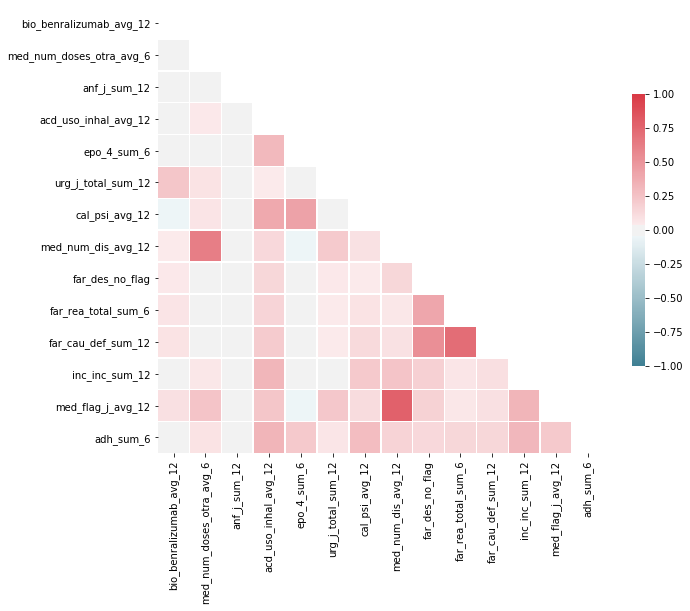

In [5]:
df_correlations = base.fillna(-1)[vec2].corr()

#mask the upper half for visualization purposes
mask = np.zeros_like(df_correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask and correct aspect ratio
plt.figure(figsize= (10,10))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df_correlations,mask=mask,  vmax=1, vmin=-1, cmap=cmap, 
            center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [6]:
base_nueva = base[ids + vec2] 

In [7]:
base_nueva.fillna(-1,inplace = True)

In [8]:
base_nueva.head()

,id,year,month,adeherencia_12,bio_benralizumab_avg_12,med_num_doses_otra_avg_6,anf_j_sum_12,acd_uso_inhal_avg_12,epo_4_sum_6,urg_j_total_sum_12,cal_psi_avg_12,med_num_dis_avg_12,far_des_no_flag,far_rea_total_sum_6,far_cau_def_sum_12,inc_inc_sum_12,med_flag_j_avg_12,adh_sum_6
0,500547,2016,7,0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,3.0,-1.000000,-1.0
1,500547,2019,3,0,-1.0,1021.800000,-1.0,-1.0,-1.0,0.0,-1.0,4.444444,-1.0,-1.0,-1.0,-1.0,0.111111,-1.0
2,500547,2019,10,0,-1.0,259.200000,-1.0,-1.0,-1.0,0.0,-1.0,3.272727,-1.0,-1.0,-1.0,-1.0,0.090909,-1.0
3,500547,2019,12,0,-1.0,596.833333,-1.0,-1.0,-1.0,0.0,-1.0,3.636364,-1.0,-1.0,-1.0,-1.0,0.090909,0.0
4,500547,2020,1,0,-1.0,732.000000,-1.0,-1.0,-1.0,0.0,-1.0,3.727273,-1.0,-1.0,-1.0,-1.0,0.000000,0.0


## 2. Datos Basicos

In [26]:
datosbasicos = pd.read_csv( ruta_archivos + 'DatosBasicos.csv', sep='|' )
#datosbasicos.info()
datosbasicos = datosbasicos.dropna()
datosbasicos = datosbasicos.drop_duplicates()

In [27]:
Agregada = base_nueva.merge(datosbasicos, on="id",how ='inner')

In [28]:
# Age using date
Agregada['edad'] = round((Agregada['year'] - Agregada['year_n']) + (Agregada['month'] - Agregada['month_n'])/12,0)

In [29]:
Agregada.drop(columns=['Unnamed: 0', 'fecha_n', 'year_n', 'month_n'], inplace= True)
Agregada2 = Agregada.copy()

In [30]:
categorias = ['genero', 'escolaridad', 'estadocivil',
       'departamento', 'ciudad', 'zona', 'nivelsocioeconomico',
       'ocupacion',]

In [31]:
for i in categorias:
    Agregada[i] = Agregada[i].astype('category')

In [32]:
df_t=Agregada.copy()
for var in categorias:
    df_t[var]=df_t[var].cat.codes

### make well the categories

- 'genero',
- 'escolaridad', 
- 'estadocivil', 
- 'nivelsocioeconomico', 
- 'zona', 
- 'ocupacion',
'departamento', 'ciudad'

Escolaridad

In [33]:

# How see de cat.code representation:
pd.concat([Agregada['escolaridad'], df_t['escolaridad']], axis=1).drop_duplicates()

,escolaridad,escolaridad
0,SECUNDARIA,4
7,PRIMARIA,3
8,UNIVERSITARIO,7
16,EDAD PREESCOLAR,1
50,TECNICO,5
51,TECNOLOGO,6
341,ANALFABETA,0
2260,POSGRADO,2


In [36]:
Agregada2['escolaridad'].unique()
letras = ['ANALFABETA', 'EDAD PREESCOLAR', 'PRIMARIA', 'SECUNDARIA', 'TECNICO', 'TECNOLOGO', 'UNIVERSITARIO', 'POSGRADO']
valor = [0,1,2,3,4,6,7]
Agregada2.replace(letras, valor)

array(['SECUNDARIA', 'PRIMARIA', 'UNIVERSITARIO', 'EDAD PREESCOLAR',
       'TECNICO', 'TECNOLOGO', 'ANALFABETA', 'POSGRADO'], dtype=object)

estadocivil

In [37]:
# How see de cat.code representation:
pd.concat([Agregada['estadocivil'], df_t['estadocivil']], axis=1).drop_duplicates()

,estadocivil,estadocivil
0,CASADO (A),0
7,SOLTERO (A),2
53,SEPARADO (A),1
60,UNIÓN LIBRE,3
266,VIUDO (A),4


In [38]:
Agregada2['estadocivil'].unique()
letras = ['SOLTERO (A)', 'UNIÓN LIBRE', 'CASADO (A)', 'SEPARADO (A)', 'VIUDO (A)']
valor = [0,1,2,3,4]
Agregada2.replace(letras, valor)

array(['CASADO (A)', 'SOLTERO (A)', 'SEPARADO (A)', 'UNIÓN LIBRE',
       'VIUDO (A)'], dtype=object)

nivelsocioeconomico

In [39]:
# How see de cat.code representation:
pd.concat([Agregada['nivelsocioeconomico'], df_t['nivelsocioeconomico']], axis=1).drop_duplicates()

,nivelsocioeconomico,nivelsocioeconomico
0,A,0
7,B,1
57,NIVEL 0 DEL SISBEN,3
84,NIVEL 1 DEL SISBEN,4
162,C,2
3421,NIVEL 2 DEL SISBEN,5


In [40]:
Agregada2['nivelsocioeconomico'].unique()
letras = ['NIVEL 0 DEL SISBEN', 'NIVEL 1 DEL SISBEN', 'NIVEL 2 DEL SISBEN', 'A', 'B', 'C']
valor = [0,1,2,3,4,5]
Agregada2.replace(letras, valor)

array(['A', 'B', 'NIVEL 0 DEL SISBEN', 'NIVEL 1 DEL SISBEN', 'C',
       'NIVEL 2 DEL SISBEN'], dtype=object)

ocupacion

In [42]:
# How see de cat.code representation:
pd.concat([Agregada['ocupacion'], df_t['ocupacion']], axis=1).drop_duplicates()

,ocupacion,ocupacion
0,EMPLEADO,2
7,ESTUDIANTE,3
8,SIN DEFINIR,7
37,PENSIONADO,6
84,DESEMPLEADO,1
95,AMA DE CASA,0
124,JUBILADO,5
255,INDEPENDIENTE,4


In [43]:
Agregada2['ocupacion'].unique()
letras = ['SIN DEFINIR', 'ESTUDIANTE', 'DESEMPLEADO', 'AMA DE CASA', 'INDEPENDIENTE', 'EMPLEADO', 'JUBILADO', 'PENSIONADO']
valor = [0,1,2,3,4,5,6,7]
Agregada2.replace(letras, valor)

array(['EMPLEADO', 'ESTUDIANTE', 'SIN DEFINIR', 'PENSIONADO',
       'DESEMPLEADO', 'AMA DE CASA', 'JUBILADO', 'INDEPENDIENTE'],
      dtype=object)

----------------------------------------------------

## 3.0 Classes

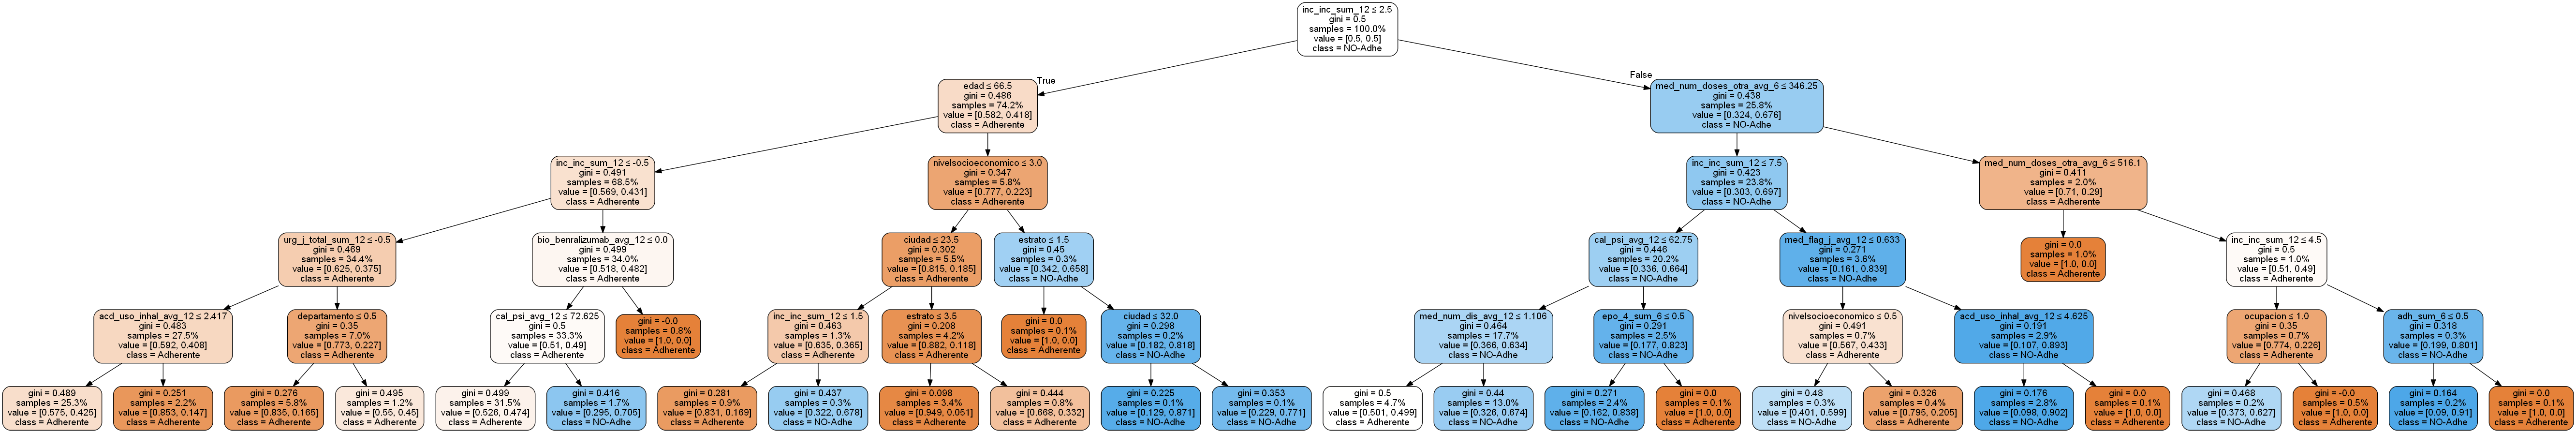

In [15]:
df_t=Agregada.copy()
for var in categorias:
    df_t[var]=df_t[var].cat.codes


clf = DecisionTreeClassifier(max_depth =5, min_samples_leaf = 3,class_weight='balanced')

# Train Decision Tree Classifer
covariates=df_t.columns[4:]

clf = clf.fit(df_t[covariates], df_t['adeherencia_12'])

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, feature_names = covariates,
                class_names=['Adherente', 'NO-Adhe'],  
                filled=True, rounded=True,
                special_characters=True, 
                impurity='gini', proportion=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [16]:
def verCat(var):
    print(pd.concat([Agregada[var], df_t[var]], axis=1).drop_duplicates())

In [93]:
# How see de cat.code representation:

pd.concat([Agregada['escolaridad'], df_t['escolaridad']], axis=1).drop_duplicates()

,escolaridad,escolaridad
0,SECUNDARIA,4
7,PRIMARIA,3
8,UNIVERSITARIO,7
16,EDAD PREESCOLAR,1
50,TECNICO,5
51,TECNOLOGO,6
341,ANALFABETA,0
2260,POSGRADO,2


In [95]:
for i in categorias:
    verCat(i)

    genero  genero
0        M       1
24       F       0
          escolaridad  escolaridad
0          SECUNDARIA            4
7            PRIMARIA            3
8       UNIVERSITARIO            7
16    EDAD PREESCOLAR            1
50            TECNICO            5
51          TECNOLOGO            6
341        ANALFABETA            0
2260         POSGRADO            2
      estadocivil  estadocivil
0      CASADO (A)            0
7     SOLTERO (A)            2
53   SEPARADO (A)            1
60    UNIÓN LIBRE            3
266     VIUDO (A)            4
      departamento  departamento
0        ANTIOQUIA             0
7     CUNDINAMARCA             4
51           VALLE             8
53       RISARALDA             7
118      ATLANTICO             1
124         CALDAS             3
703        QUINDIO             6
1944     MAGDALENA             5
2680       BOLIVAR             2
                  ciudad  ciudad
0               MEDELLIN      27
7                 BOGOTA       5
16           

----------------------------------------------------

## 3. Modelos

In [17]:
X = df_t[covariates]
y = df_t['adeherencia_12']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

### Stupid model
each person is adherent 

In [19]:
print('accuracy is: ', round(100*(1-y.sum()/len(y)),2),'%')

accuracy is:  77.07 %


### DecisionTreeRegressor

In [20]:
treereg = DecisionTreeRegressor(max_depth =5, min_samples_leaf = 30)
treereg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=30, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [21]:
yt_pred = np.where(treereg.predict(X_test) >= 0.5, 1, 0)

[[569  13]
 [152  17]]
              precision    recall  f1-score   support

           0       0.79      0.98      0.87       582
           1       0.57      0.10      0.17       169

    accuracy                           0.78       751
   macro avg       0.68      0.54      0.52       751
weighted avg       0.74      0.78      0.72       751



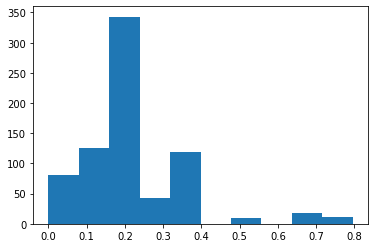

In [22]:
plt.hist(treereg.predict(X_test))
print(confusion_matrix(y_test, yt_pred))
print(classification_report(y_test, yt_pred))

### Logistic Regression

In [23]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
yl_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.78


[[563  19]
 [145  24]]
              precision    recall  f1-score   support

           0       0.80      0.97      0.87       582
           1       0.56      0.14      0.23       169

    accuracy                           0.78       751
   macro avg       0.68      0.55      0.55       751
weighted avg       0.74      0.78      0.73       751



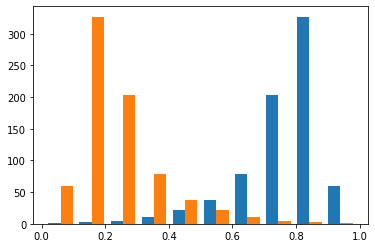

In [25]:
plt.hist(logreg.predict_proba(X_test))
print(confusion_matrix(y_test, yl_pred))
print(classification_report(y_test, yl_pred))

### Random forest

In [26]:
forest = RandomForestClassifier(n_estimators=20, max_depth=2, random_state=42)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

[[582   0]
 [169   0]]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87       582
           1       0.00      0.00      0.00       169

    accuracy                           0.77       751
   macro avg       0.39      0.50      0.44       751
weighted avg       0.60      0.77      0.68       751



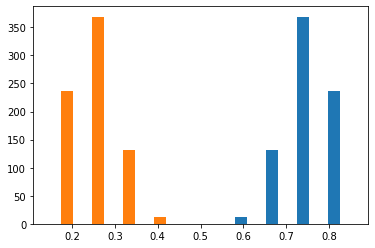

In [27]:
yf_pred = forest.predict(X_test)
plt.hist(forest.predict_proba(X_test))
print(confusion_matrix(y_test, yf_pred))
print(classification_report(y_test, yf_pred))

## 4. Fitting Hyperparameters 

### Random forest

In [54]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [1, 2, 3, 4, 5],
    'min_samples_leaf': [10, 30, 50],
    'n_estimators': [5, 10, 20, 50]
}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced')
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [55]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 165 out of 180 | elapsed:    4.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    4.5s finished


{'bootstrap': True, 'max_depth': 5, 'min_samples_leaf': 10, 'n_estimators': 50}

[[457 125]
 [ 90  79]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       582
           1       0.39      0.47      0.42       169

    accuracy                           0.71       751
   macro avg       0.61      0.63      0.62       751
weighted avg       0.73      0.71      0.72       751



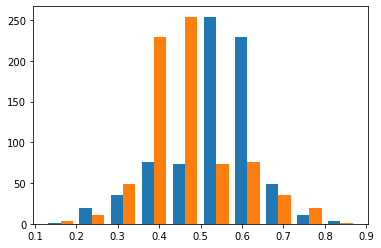

In [56]:
best_grid = grid_search.best_estimator_
y_opt = best_grid.predict(X_test)

plt.hist(best_grid.predict_proba(X_test))

print(confusion_matrix(y_test, y_opt))
print(classification_report(y_test, y_opt))

## 5. Tuning the 50% split 

### Random forest

In [57]:
y_mol = best_grid.predict_proba(X_test)[:,1]

In [58]:
accm = -1
split = 0.5
for i in range(100):
    p = i/100
    y_split = np.where(y_mol >= p, 1, 0)
    if accuracy_score(y_test, y_split)>accm:
        accm = accuracy_score(y_test, y_split)
        split = p
print ('Max accuracy is in split: ',split, 'with acc:',round(accm,2))

Max accuracy is in split:  0.64 with acc: 0.79


### Decision tree Regressor

In [33]:
y_mol = treereg.predict(X_test)

In [34]:
accm = -1
split = 0.5
for i in range(100):
    p = i/100
    y_split = np.where(y_mol >= p, 1, 0)
    if accuracy_score(y_test, y_split)>accm:
        accm = accuracy_score(y_test, y_split)
        split = p
print ('Max accuracy is in split: ',split, 'with acc:',round(accm,2))

Max accuracy is in split:  0.49 with acc: 0.78


### Logistic regresion

In [35]:
y_mol = logreg.predict_proba(X_test)[:,1]

In [36]:
accm = -1
split = 0.5
for i in range(100):
    p = i/100
    y_split = np.where(y_mol >= p, 1, 0)
    if accuracy_score(y_test, y_split)>accm:
        accm = accuracy_score(y_test, y_split)
        split = p
print ('Max accuracy is in split: ',split, 'with acc:',round(accm,2))

Max accuracy is in split:  0.41 with acc: 0.79


## 6. AUC Plot

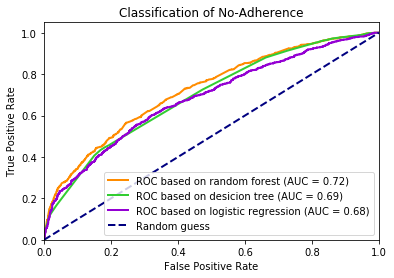

In [37]:
#Next we plot the ROC curve:
roc_rf = metrics.roc_curve(y, best_grid.predict_proba(X)[:,1])
auc_rf = metrics.auc( roc_rf[0], roc_rf[1] )

roc_dt = metrics.roc_curve(y, treereg.predict(X))
auc_dt = metrics.auc( roc_dt[0], roc_dt[1] )

roc_lr = metrics.roc_curve(y, logreg.predict_proba(X)[:,1])
auc_lr = metrics.auc( roc_lr[0], roc_lr[1] )


plt.figure()
line_width = 2
plt.plot(roc_rf[0], roc_rf[1], color='darkorange', lw=line_width,
         label=f"ROC based on random forest (AUC = {auc_rf:0.2f})")

plt.plot(roc_dt[0], roc_dt[1], color='limegreen', lw=line_width,
         label=f"ROC based on desicion tree (AUC = {auc_dt:0.2f})")

plt.plot(roc_lr[0], roc_lr[1], color='darkviolet', lw=line_width,
         label=f"ROC based on logistic regression (AUC = {auc_lr:0.2f})")

plt.plot([0, 1], [0, 1], color='navy', lw=line_width, linestyle='--', label='Random guess')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Classification of No-Adherence')
plt.legend(loc='lower right')
plt.show()

## 7. K-means

In [2]:
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42)

NameError: name 'np' is not defined

we select some variables using the desicion tree to create a number (4) cluster to people in adherence proyect:

- 'edad'
- 'inc_inc_sum_12',
- 'predict'

In [59]:
# Add prediction
df_t['predict'] = best_grid.predict_proba(X)[:,1]

var = ['edad','inc_inc_sum_12','predict']

n_digits: 4, 	 n_samples 3751, 	 n_features 3


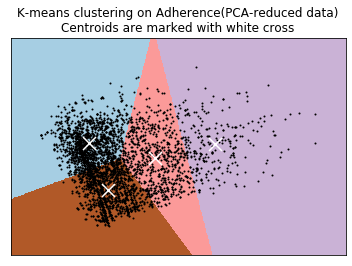

In [40]:
X_digits, y_digits = df_t[var], df_t['adeherencia_12']
# Get training data mean and standard deviation
X_mean = X_digits.mean()
X_std =  X_digits.std()
#data = X_digits
#data = (X_train - X_mean) / X_std
data = scale(X_digits)

n_samples, n_features = data.shape
n_digits = 4                                # numero de clases 
labels = y_digits

sample_size = 300

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))

# #############################################################################
# Visualize the results on PCA-reduced data
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on Adherence(PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [41]:
# Get training data mean and standard deviation
X_mean = X_digits.mean()
X_std =  X_digits.std()

# Center data (common practice when using regularization techniques)
# X_train = (X_train - training_mean) / training_std # normalize (use training mean and training std)

centro = []
for i in centroids:
    c0 = pca.inverse_transform(i)
    C0 = c0*X_mean + X_std
    centro.append(C0)
    
centro = pd.concat(centro, axis = 1).T
centro

,edad,inc_inc_sum_12,predict
0,54.005141,2.288098,-0.034640
1,7.913064,4.096746,0.300658
2,3.749808,6.170161,0.628811
3,-16.641601,2.171982,0.028861


In [1]:
# Without PCA
kmeans = KMeans(init='k-means++', n_clusters=4, n_init=10)
kmeans.fit(data)
centroids = kmeans.cluster_centers_

centro = []
for i in centroids:
    C0 = i*X_mean + X_std
    centro.append(C0)
    
centro = pd.concat(centro, axis = 1).T
centro


NameError: name 'KMeans' is not defined

In [43]:
from collections import Counter
print(Counter(kmeans.labels_))

Counter({1: 1571, 2: 1252, 0: 665, 3: 263})


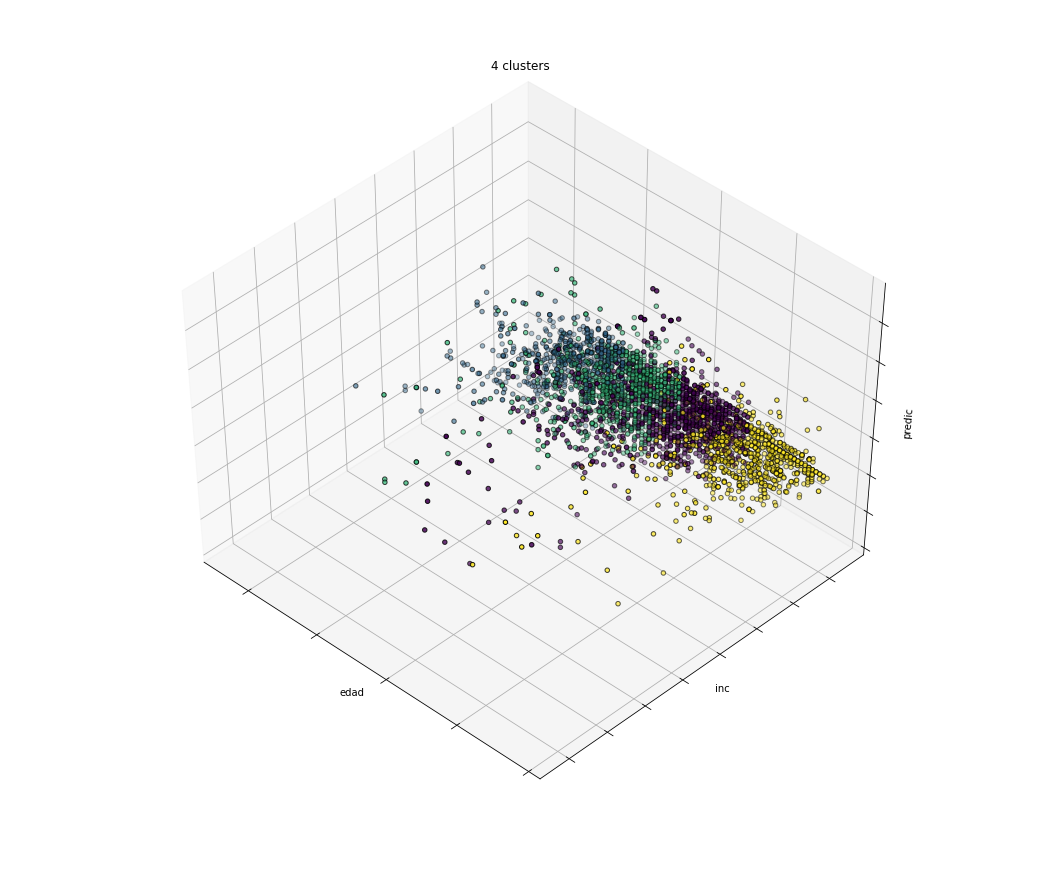

In [44]:
from mpl_toolkits.mplot3d import Axes3D
estimators = [('k_means4', KMeans(init='k-means++', n_clusters=2, n_init=10))]

fignum = 1
titles = ['4 clusters']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(15, 12))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X_digits)
    labels = est.labels_

    ax.scatter(X_digits.iloc[:, 0], X_digits.iloc[:, 1], X_digits.iloc[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('edad')
    ax.set_ylabel('inc')
    ax.set_zlabel('predic')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

------------------------------------------

In [70]:
df_t['predictrl'] = logreg.predict_proba(X)[:,1]
df_t['predict'] = best_grid.predict_proba(X)[:,1]

In [62]:
df_t['adrl'] = logreg.predict(X)
df_t['adrf'] = best_grid.predict(X)

In [64]:
df_t[['id','adeherencia_12','adrl','adrf']].groupby(['adeherencia_12','adrl','adrf']).count().reset_index()

,adeherencia_12,adrl,adrf,id
0,0,0,0,2315
1,0,0,1,506
2,0,1,0,3
3,0,1,1,67
4,1,0,0,393
5,1,0,1,330
6,1,1,1,137


In [65]:
df_t[['id','adeherencia_12','predict','predictrl']]

,id,adeherencia_12,predict,predictrl
0,500547,0,0.539111,0.253362
1,500547,0,0.250045,0.029835
2,500547,0,0.343649,0.077589
3,500547,0,0.284793,0.058614
4,500547,0,0.264082,0.047055
...,...,...,...,...
3746,1999536,0,0.446116,0.164511
3747,1999536,0,0.451851,0.205725
3748,1999629,0,0.463370,0.217460
3749,1999629,0,0.448137,0.258085


In [71]:
df_t['predict'] = round(df_t['predict'],1)
df_t['predictrl'] = round(df_t['predictrl'],1)

In [72]:
df_t[['id','adeherencia_12','predict','predictrl']]

,id,adeherencia_12,predict,predictrl
0,500547,0,0.5,0.3
1,500547,0,0.3,0.0
2,500547,0,0.3,0.1
3,500547,0,0.3,0.1
4,500547,0,0.3,0.0
...,...,...,...,...
3746,1999536,0,0.4,0.2
3747,1999536,0,0.5,0.2
3748,1999629,0,0.5,0.2
3749,1999629,0,0.4,0.3


In [75]:
df = df_t[['id','adeherencia_12','predict','predictrl']].groupby(['adeherencia_12','predict','predictrl']).count().reset_index()

In [76]:
df.to_csv('adherencia.csv',sep='|')

In [77]:
df

,adeherencia_12,predict,predictrl,id
0,0,0.1,0.0,6
1,0,0.2,0.0,11
2,0,0.2,0.1,15
3,0,0.3,0.0,23
4,0,0.3,0.1,252
...,...,...,...,...
66,1,0.8,0.5,3
67,1,0.8,0.6,14
68,1,0.8,0.7,8
69,1,0.8,0.8,13


In [78]:
df_t

,id,year,month,adeherencia_12,bio_benralizumab_avg_12,med_num_doses_otra_avg_6,anf_j_sum_12,acd_uso_inhal_avg_12,epo_4_sum_6,bio_omalizumab_avg_6,...,ciudad,estrato,zona,nivelsocioeconomico,ocupacion,edad,predict,predictrl,adrl,adrf
0,500547,2016,7,0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,...,27,3.0,1,0,2,54.0,0.5,0.3,0,1
1,500547,2019,3,0,-1.0,1021.800000,-1.0,-1.0,-1.0,-1.0,...,27,3.0,1,0,2,57.0,0.3,0.0,0,0
2,500547,2019,10,0,-1.0,259.200000,-1.0,-1.0,-1.0,3.0,...,27,3.0,1,0,2,57.0,0.3,0.1,0,0
3,500547,2019,12,0,-1.0,596.833333,-1.0,-1.0,-1.0,3.0,...,27,3.0,1,0,2,58.0,0.3,0.1,0,0
4,500547,2020,1,0,-1.0,732.000000,-1.0,-1.0,-1.0,3.0,...,27,3.0,1,0,2,58.0,0.3,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,1999536,2018,8,0,-1.0,2.000000,-1.0,-1.0,-1.0,1.0,...,25,4.0,1,1,2,27.0,0.4,0.2,0,0
3747,1999536,2020,2,0,-1.0,33.400000,-1.0,-1.0,-1.0,1.0,...,25,4.0,1,1,2,28.0,0.5,0.2,0,0
3748,1999629,2018,4,0,-1.0,3.666667,-1.0,-1.0,-1.0,2.0,...,27,3.0,1,0,3,19.0,0.5,0.2,0,0
3749,1999629,2018,5,0,-1.0,3.000000,-1.0,-1.0,-1.0,2.0,...,27,3.0,1,0,3,20.0,0.4,0.3,0,0


In [ ]:
df_t[df_t['year']==]

In [91]:
datosbasicos

,Unnamed: 0,id,genero,escolaridad,estadocivil,departamento,ciudad,estrato,zona,nivelsocioeconomico,ocupacion,fecha_n,year_n,month_n
0,0,500547,M,SECUNDARIA,CASADO (A),ANTIOQUIA,MEDELLIN,3.0,URBANA,A,EMPLEADO,1962-05-19,1962.0,5.0
1,1,500588,M,PRIMARIA,SOLTERO (A),CUNDINAMARCA,BOGOTA,2.0,URBANA,B,ESTUDIANTE,2004-12-19,2004.0,12.0
2,2,502989,M,UNIVERSITARIO,SOLTERO (A),ANTIOQUIA,MEDELLIN,3.0,URBANA,A,SIN DEFINIR,1990-08-22,1990.0,8.0
3,3,506808,M,EDAD PREESCOLAR,SOLTERO (A),ANTIOQUIA,BELLO,1.0,URBANA,A,ESTUDIANTE,2008-10-06,2008.0,10.0
4,4,512938,F,SECUNDARIA,SOLTERO (A),ANTIOQUIA,MEDELLIN,3.0,URBANA,A,EMPLEADO,1997-10-15,1997.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,883,1997065,M,EDAD PREESCOLAR,SOLTERO (A),ANTIOQUIA,MEDELLIN,3.0,URBANA,B,ESTUDIANTE,2011-03-20,2011.0,3.0
884,884,1997825,F,UNIVERSITARIO,SOLTERO (A),ATLANTICO,BARRANQUILLA,3.0,URBANA,B,EMPLEADO,1991-12-27,1991.0,12.0
885,885,1998401,F,SECUNDARIA,CASADO (A),ANTIOQUIA,MEDELLIN,2.0,URBANA,A,AMA DE CASA,1970-01-11,1970.0,1.0
886,886,1999536,F,UNIVERSITARIO,SOLTERO (A),CALDAS,MANIZALES,4.0,URBANA,B,EMPLEADO,1991-09-10,1991.0,9.0
